In [1]:
# Only enable critical logging (Optional)
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"


In [2]:
from pycaret.time_series import *
import pandas as pd


In [3]:
data = pd.read_csv("data/petr_brent.csv")
data.index = pd.to_datetime(data["DATE"])
start = data.index[0].date()
end = data.index[len(data) - 1].date()
new_dates = pd.date_range(start=start, end=end, freq="D")
data = data.reindex(new_dates)
data = data.rename_axis("DATE")


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8169 entries, 2002-01-01 to 2024-05-13
Freq: D
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         7600 non-null   object 
 1   CODE         7600 non-null   object 
 2   RAW DATE     7600 non-null   object 
 3   DAY          7600 non-null   float64
 4   MONTH        7600 non-null   float64
 5   YEAR         7600 non-null   float64
 6   VALUE (US$)  7459 non-null   float64
dtypes: float64(4), object(3)
memory usage: 510.6+ KB


In [5]:
# preenche missing
data["VALUE (US$)"] = data["VALUE (US$)"].interpolate().bfill()
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8169 entries, 2002-01-01 to 2024-05-13
Freq: D
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         7600 non-null   object 
 1   CODE         7600 non-null   object 
 2   RAW DATE     7600 non-null   object 
 3   DAY          7600 non-null   float64
 4   MONTH        7600 non-null   float64
 5   YEAR         7600 non-null   float64
 6   VALUE (US$)  8169 non-null   float64
dtypes: float64(4), object(3)
memory usage: 510.6+ KB


In [6]:
target = data["VALUE (US$)"]
target.info()


<class 'pandas.core.series.Series'>
DatetimeIndex: 8169 entries, 2002-01-01 to 2024-05-13
Freq: D
Series name: VALUE (US$)
Non-Null Count  Dtype  
--------------  -----  
8169 non-null   float64
dtypes: float64(1)
memory usage: 127.6 KB


In [7]:
target = target.tail(3000)


<Axes: xlabel='DATE'>

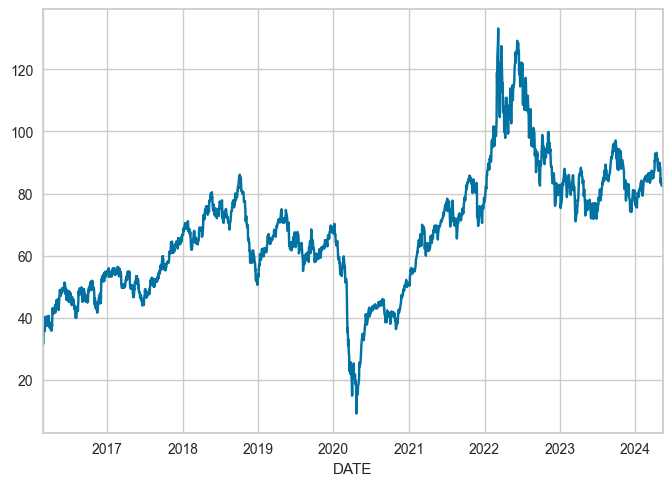

In [8]:
target.plot()


In [20]:
experiment = TSForecastingExperiment()
# experiment.setup(data=target, fh=180, fold=5, use_gpu=True, scale_target='maxabs')
experiment.setup(data=target, fh=180, fold=3, use_gpu=True, scale_target="maxabs")


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there a

In [21]:
experiment.plot_model()


In [22]:
experiment.plot_model(data_kwargs={"plot_data_type": ["transformed"]})


In [23]:
experiment.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})


In [13]:
experiment.plot_model(
    plot="diff",
    data_kwargs={
        "lags_list": [[1], [1, 16]],
        "acf": True,
        "pacf": True,
        "periodogram": True,
    },
    fig_kwargs={"height": 800, "width": 1500},
)


In [24]:
experiment.plot_model(plot="train_test_split", fig_kwargs={"height": 400, "width": 900})


In [15]:
# experiment.plot_model(plot="cv", fig_kwargs={"height": 400, "width": 900})


In [25]:
experiment.check_stats()


Test   Test Name         Data             Property  \
0        Summary  Statistics  Transformed               Length   
1        Summary  Statistics  Transformed     # Missing Values   
2        Summary  Statistics  Transformed                 Mean   
3        Summary  Statistics  Transformed               Median   
4        Summary  Statistics  Transformed   Standard Deviation   
5        Summary  Statistics  Transformed             Variance   
6        Summary  Statistics  Transformed             Kurtosis   
7        Summary  Statistics  Transformed             Skewness   
8        Summary  Statistics  Transformed    # Distinct Values   
9    White Noise   Ljung-Box  Transformed       Test Statictic   
10   White Noise   Ljung-Box  Transformed       Test Statictic   
11   White Noise   Ljung-Box  Transformed              p-value   
12   White Noise   Ljung-Box  Transformed              p-value   
13   White Noise   Ljung-Box  Transformed          White Noise   
14   White Noise   Ljung-Box  Transformed          White Noise   
15  Stationarity         ADF  Transformed         Stationarity   
16  Stationarity         ADF  Transformed              p-value   
17  Stationarity         ADF  Transformed       Test Statistic   
18  Stationarity         ADF  Transformed    Critical Value 1%   
19  Stationarity         ADF  Transformed    Critical Value 5%   
20  Stationarity         ADF  Transformed   Critical Value 10%   
21  Stationarity        KPSS  Transformed   Trend Stationarity   
22  Stationarity        KPSS  Transformed              p-value   
23  Stationarity        KPSS  Transformed       Test Statistic   
24  Stationarity        KPSS  Transformed   Critical Value 10%   
25  Stationarity        KPSS  Transformed    Critical Value 5%   
26  Stationarity        KPSS  Transformed  Critical Value 2.5%   
27  Stationarity        KPSS  Transformed    Critical Value 1%   
28     Normality     Shapiro  Transformed            Normality   
29     Normality     Shapiro  Transformed              p-value   

                     Setting          Value  
0                                    3000.0  
1                                       0.0  
2                                  0.507436  
3                                  0.501577  
4                                  0.150095  
5                                  0.022529  
6                                  0.230793  
7                                  0.324732  
8                                    2323.0  
9   {'alpha': 0.05, 'K': 24}    67372.88618  
10  {'alpha': 0.05, 'K': 48}  125368.312845  
11  {'alpha': 0.05, 'K': 24}            0.0  
12  {'alpha': 0.05, 'K': 48}            0.0  
13  {'alpha': 0.05, 'K': 24}            0.0  
14  {'alpha': 0.05, 'K': 48}            0.0  
15           {'alpha': 0.05}          False  
16           {'alpha': 0.05}       0.261871  
17           {'alpha': 0.05}      -2.057675  
18           {'alpha': 0.05}      -3.432544  
19           {'alpha': 0.05}      -2.862509  
20           {'alpha': 0.05}      -2.567286  
21           {'alpha': 0.05}          False  
22           {'alpha': 0.05}           0.01  
23           {'alpha': 0.05}       0.515138  
24           {'alpha': 0.05}          0.119  
25           {'alpha': 0.05}          0.146  
26           {'alpha': 0.05}          0.176  
27           {'alpha': 0.05}          0.216  
28           {'alpha': 0.05}          False  
29           {'alpha': 0.05}            0.0

In [26]:
experiment.plot_model(plot="decomp_stl", fig_kwargs={"height": 400, "width": 900})


In [27]:
experiment.models()


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there a

Name  \
ID                                                                   
naive                                             Naive Forecaster   
grand_means                                 Grand Means Forecaster   
snaive                                   Seasonal Naive Forecaster   
polytrend                              Polynomial Trend Forecaster   
arima                                                        ARIMA   
auto_arima                                              Auto ARIMA   
exp_smooth                                   Exponential Smoothing   
ets                                                            ETS   
theta                                             Theta Forecaster   
stlf                                                          STLF   
croston                                                    Croston   
bats                                                          BATS   
tbats                                                        TBATS   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...   
catboost_cds_dt  CatBoost Regressor w/ Cond. Deseasonalize & De...   

                                                         Reference  Turbo  
ID                                                                         
naive                     sktime.forecasting.naive.NaiveForecaster   True  
grand_means               sktime.forecasting.naive.NaiveForecaster   True  
snaive                    sktime.forecasting.naive.NaiveForecaster   True  
polytrend        sktime.forecasting.trend._polynomial_trend_for...   True  
arima                               sktime.forecasting.arima.ARIMA   True  
auto_arima                      sktime.forecasting.arima.AutoARIMA   True  
exp_smooth       sktime.forecasting.exp_smoothing.ExponentialSm...   True  
ets                                 sktime.forecasting.ets.AutoETS   True  
theta                     sktime.forecasting.theta.ThetaForecaster   True  
stlf             sktime.forecasting.trend._stl_forecaster.STLFo...   True  
croston                         sktime.forecasting.croston.Croston   True  
bats                                  sktime.forecasting.bats.BATS  False  
tbats                               sktime.forecasting.tbats.TBATS  False  
lr_cds_dt        pycaret.containers.models.time_series.BaseCdsD...   True  
en_cds_dt        pycaret.containers.models.time_series.BaseCdsD...   True  
ridge_cds_dt     pycaret.containers.models.time_series.BaseCdsD...   True  
lasso_cds_dt     pycaret.containers.models.time_series.BaseCdsD...   True  
llar_cds_dt      pycaret.containers.models.time_series.BaseCdsD...   True  
br_cds_dt        pycaret.containers.models.time_series.BaseCdsD...   True  
huber_cds_dt     pycaret.containers.models.time_series.BaseCdsD...   True  
omp_cds_dt       pycaret.containers.models.time_series.BaseCdsD...   True  
knn_cds_dt       pycaret.containers.models.time_series.BaseCdsD...   True  
dt_cds_dt        pycaret.containers.models.time_series.BaseCdsD... 

In [28]:
# best = experiment.compare_models(n_select=5, turbo=False, include = ['dt_cds_dt','lr_cds_dt','ets', 'auto_arima', 'naive', 'snaive',  'polytrend', 'omp_cds_dt'])
best = experiment.compare_models(n_select=8, turbo=False)


In [29]:
best


[BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [16, 15,
                                                                         14, 13,
                                                                         12, 11,
                                                                         10, 9,
                                                                         8, 7, 6,
                                                                         5, 4, 3,
                                                                         2, 1]},
                                                    n_jobs=1)],
                     regressor=DecisionTreeRegressor(random_state=7451), sp=16,
                     window_length=16),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [16, 15,
                                                                         14, 13,
                                                                         12, 11,
     

In [30]:
experiment.plot_model(best, plot="forecast")


In [31]:
best_tuned_models = [experiment.tune_model(model) for model in best]


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   25.0s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.3s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   16.9s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.6s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.1s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   33.4s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.5s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   30.6s remaining:   30.6s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   44.0s finished


In [40]:
display(experiment.pull().iloc[0:8])


cutoff    MASE   RMSSE      MAE     RMSE    MAPE   SMAPE      R2
0     2022-05-24  4.2836  3.5037  15.7216  18.0762  0.1638  0.1478 -1.0373
1     2022-11-20  1.6706  1.4230   6.4431   7.6202  0.0820  0.0774 -2.4228
2     2023-05-19  2.3494  2.0757   9.3294  11.3507  0.1048  0.1133 -1.5474
Mean         NaT  2.7679  2.3341  10.4980  12.3490  0.1169  0.1128 -1.6692
SD           NaT  1.1070  0.8689   3.8770   4.3266  0.0345  0.0288  0.5721

In [59]:
best_tuned_models


[BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [16, 15,
                                                                         14, 13,
                                                                         12, 11,
                                                                         10, 9,
                                                                         8, 7, 6,
                                                                         5, 4, 3,
                                                                         2, 1]},
                                                    n_jobs=1)],
                     regressor=DecisionTreeRegressor(random_state=7451), sp=16,
                     window_length=16),
 BaseCdsDtForecaster(deseasonal_model='multiplicative',
                     fe_target_rr=[WindowSummarizer(lag_feature={'lag': [16, 15,
                                                                         14, 13,
                              

In [55]:
best_1 = [best_tuned_models[0], best_tuned_models[6]]
best_1


[BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [16, 15,
                                                                         14, 13,
                                                                         12, 11,
                                                                         10, 9,
                                                                         8, 7, 6,
                                                                         5, 4, 3,
                                                                         2, 1]},
                                                    n_jobs=1)],
                     regressor=DecisionTreeRegressor(random_state=7451), sp=16,
                     window_length=16),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [16, 15,
                                                                         14, 13,
                                                                         12, 11,
     

In [65]:
blender = experiment.blend_models(best_1, method="gmean", optimize="SMAPE")


In [66]:
y_predict = experiment.predict_model(blender)
y_predict


y_pred
2023-11-16  82.5463
2023-11-17  83.4502
2023-11-18  82.7588
2023-11-19  82.6022
2023-11-20  83.1840
...             ...
2024-05-09  92.1714
2024-05-10  91.9644
2024-05-11  92.1151
2024-05-12  92.1945
2024-05-13  92.0008

[180 rows x 1 columns]

In [67]:
experiment.plot_model(estimator=blender)


# Finalize the model

In [68]:
final_model = experiment.finalize_model(blender)
print(experiment.predict_model(final_model))
experiment.plot_model(final_model)


             y_pred
2024-05-14  83.3085
2024-05-15  82.7182
2024-05-16  83.8953
2024-05-17  83.9903
2024-05-18  85.0674
...             ...
2024-11-05  98.1373
2024-11-06  98.8112
2024-11-07  98.7771
2024-11-08  98.6404
2024-11-09  98.4509

[180 rows x 1 columns]


In [58]:
experiment.plot_model(best[3], plot="forecast")


In [62]:
compare_metrics = experiment.pull()
compare_metrics


Model    MASE   RMSSE    MAE    RMSE   MAPE   SMAPE     R2
0  DecisionTreeRegressor  1.7839  1.5033  7.037  8.1202  0.085  0.0839 -2.497

In [ ]:
model = experiment.create_model("auto_arima")


In [ ]:
y_predict = experiment.predict_model(model)
experiment.plot_model(estimator=model)


In [ ]:
model = experiment.create_model("lightgbm_cds_dt")


In [ ]:
y_predict = experiment.predict_model(model, data)
experiment.plot_model(estimator=model)


In [ ]:
model = experiment.create_model("exp_smooth")


In [ ]:
y_predict = experiment.predict_model(model)

experiment.plot_model(estimator=model)


# Salvar o modelo

In [ ]:
# save pipeline
save_model(best, "my_first_pipeline")


In [ ]:
# load pipeline
loaded_best_pipeline = load_model("my_first_pipeline")
loaded_best_pipeline
